<a href="https://colab.research.google.com/github/mapmatters/my-exercise/blob/master/Page_Rank_Algorithm_A60039_Park_Yongjae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 박용재 A60039

* 라이브러리 Load (NetwrokX 활용)
* empty graph 생성 (directed graph)


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

G=nx.DiGraph()


빈 graph에 node 추가하기 : add_nodes_from()


In [2]:
# a list of nodes:
sites = ["A","B","C","D"]
G.add_nodes_from(sites)

print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())


Nodes of graph: 
['A', 'B', 'C', 'D']
Edges of graph: 
[]


Edge 여러개 동시에 생성하기: add_edges_from()

In [3]:
sites_edges = [('A','B'), ('A','C'),('A','D'), ('B','C'),('B','D'),('C','D'),('C','A'),('D','C')]
G.add_edges_from(sites_edges)

print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

Nodes of graph: 
['A', 'B', 'C', 'D']
Edges of graph: 
[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'A'), ('D', 'C')]


노드 별 out-link, in-link 갯수 확인

In [4]:
# out-link
print("Count of out-links for each node:")
for site in sites:
    print(["Site %s = %s"% (site ,str(len(G.out_edges(site))))])

Count of out-links for each node:
['Site A = 3']
['Site B = 2']
['Site C = 2']
['Site D = 1']


In [5]:
# in-link
for site in sites:
    print(["Site %s = %s"% (site ,str(len(G.in_edges(site))))])

['Site A = 1']
['Site B = 1']
['Site C = 3']
['Site D = 3']


Garph 확인

In [6]:
# array 형태로 보기
g_arr = nx.to_numpy_array(G, nodelist=sites)
print(g_arr, '\n')
print(g_arr[0][1])

[[0. 1. 1. 1.]
 [0. 0. 1. 1.]
 [1. 0. 0. 1.]
 [0. 0. 1. 0.]] 

1.0


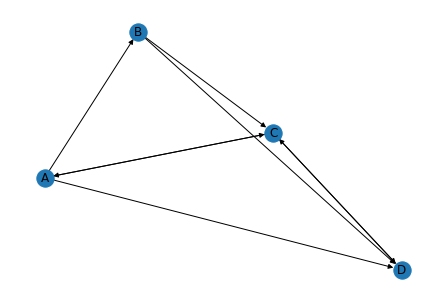

In [7]:
# 그래프 형태로 보기
nx.draw(G, with_labels = True)
plt.show() # display

## 초기값 설정 & iteration
* 초기값 = 1/(N of sites)
* Damping Factor = 0.85
* iteration: 값이 변화하는 것을 확인하면서 안정화 시점의 iteration 횟수 확인

## pr(A) 갱신 방법
* pr(A) = (1-DF)/(페이지 전체 개수) + DF * ((A로 향하는 각 페이지의 현재 pr 값 / A로 향하는 페이지의 out link 개수) 들의 합)

## 계산식
$$G = Nework\ Matrix\ (2\ dimension\ array)$$
$$pr(A) = DF \times (G \cdot (weight \times outLink)) + \frac{(1-DF)}{N}$$

In [8]:
# 초기값 설정
DF = 0.85 # Damping factor
N = len(G.nodes()) # 페이지 갯수
g_arr # connected information (graph)
site_rank = np.ones(N)/N # 초기 weight 분배 -> transpose
out_link = np.ones(shape=(N,))

In [9]:
# in-link 갯수 array 만들기
dict_sites = dict(zip(np.array(range(N)),sites)) # number와 site name을 매칭하기 위해 dictionary 형태로 zip으로 묶기
for i in range(N):
  out_link[i] = len(G.out_edges(dict_sites[i]))

In [10]:
print('DF: {0}'.format(DF))
print('Number of sites: {0}'.format(N))
print('Network matrix:\n {0}'.format(g_arr))
print('Value of each node (init value): \n {0}'.format(site_rank))
print('Count of out-link of each node: \n {0}'.format(dict(zip(sites,out_link))))

DF: 0.85
Number of sites: 4
Network matrix:
 [[0. 1. 1. 1.]
 [0. 0. 1. 1.]
 [1. 0. 0. 1.]
 [0. 0. 1. 0.]]
Value of each node (init value): 
 [0.25 0.25 0.25 0.25]
Count of out-link of each node: 
 {'A': 3.0, 'B': 2.0, 'C': 2.0, 'D': 1.0}


In [11]:
# before iteration
site_rank

array([0.25, 0.25, 0.25, 0.25])

In [12]:
# 1st iteration
site_rank = ((1-DF)*np.ones(N))/N + (DF*g_arr).dot(site_rank/out_link)
print('Each Node value: {0}'.format(site_rank))

Each Node value: [0.4625     0.35625    0.32083333 0.14375   ]


In [13]:
# 2nd iteration
site_rank = ((1-DF)*np.ones(N))/N + (DF*g_arr).dot(site_rank/out_link)
print('Each Node value: {0}'.format(site_rank))

Each Node value: [0.44744792 0.29604167 0.29072917 0.17385417]


In [14]:
# 3rd iteration
site_rank = ((1-DF)*np.ones(N))/N + (DF*g_arr).dot(site_rank/out_link)
print('Each Node value: {0}'.format(site_rank))

Each Node value: [0.43465365 0.30883594 0.31205295 0.1610599 ]


In [15]:
# iteration 별 결과 출력 (30회)
i = 0
site_rank = np.ones(N)/N 
for i in range(30):
  i +=1
  site_rank = ((1-DF)*np.ones(N))/N + (DF*g_arr).dot(site_rank/out_link)
  print('Each Node value({0}): {1}'.format(i, site_rank))

Each Node value(1): [0.4625     0.35625    0.32083333 0.14375   ]
Each Node value(2): [0.44744792 0.29604167 0.29072917 0.17385417]
Each Node value(3): [0.43465365 0.30883594 0.31205295 0.1610599 ]
Each Node value(4): [0.43827869 0.30702342 0.29755278 0.1701225 ]
Each Node value(5): [0.43904901 0.30856406 0.30628309 0.16395993]
Each Node value(6): [0.43817598 0.30703625 0.30126316 0.16767031]
Each Node value(7): [0.43854702 0.30805661 0.30416963 0.16553684]
Each Node value(8): [0.43840247 0.30747841 0.30246131 0.16677209]
Each Node value(9): [0.43848066 0.30780233 0.30347031 0.16604605]
Each Node value(10): [0.43843002 0.30761403 0.30287533 0.16647488]
Each Node value(11): [0.43846163 0.30772567 0.30322549 0.16622202]
Each Node value(12): [0.43844295 0.30765955 0.30301951 0.16637083]
Each Node value(13): [0.43845381 0.3076985  0.30314071 0.16628329]
Each Node value(14): [0.43844746 0.3076756  0.30306938 0.1663348 ]
Each Node value(15): [0.4384512  0.30768907 0.30311136 0.16630448]
Each

# Function 구현

In [16]:
def page_rank(Graph_Data, iter, damping_factor):
  nodes = np.array(Graph_Data.nodes())
  N = len(nodes) # 페이지 갯수
  g_arr = nx.to_numpy_array(Graph_Data, nodelist=nodes)

  nx.draw(Graph_Data, with_labels = True)
  plt.show() # display

  DF = damping_factor # Damping factor
  
  node_rank = np.ones(N)/N # 초기 weight 분배 -> transpose
  out_link = np.ones(shape=(N,))

  dict_nodes = dict(zip(np.array(range(N)),nodes)) # number와 site name을 매칭하기 위해 dictionary 형태로 zip으로 묶기
  
  for i in range(N):
    out_link[i] = len(G.out_edges(dict_nodes[i]))
  for i in range(iter):
    i +=1
    node_rank = ((1-DF)*np.ones(N))/N + (DF*g_arr).dot(node_rank/out_link)

  max_where = np.where(node_rank == node_rank.max())
  max_node = np.array(G.nodes())[max_where]

  print('Node 갯수: {0}'.format(N))
  print('Network matrix:\n {0}'.format(g_arr))
  print('Each Node value(iteration {0}): {1}'.format(iter, node_rank))
  print('Highest Page Rank: {0}'.format(max_node))

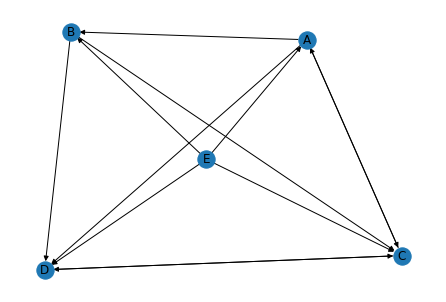

Node 갯수: 5
Network matrix:
 [[0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 0.]
 [1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 1. 1. 1. 0.]]
Each Node value(iteration 100): [0.34319066 0.24513619 0.24046693 0.13618677 0.43470817]
Highest Page Rank: ['E']


In [17]:
# 새로운 5개 노드의 그래프를 넣어서 page_rank 알고리즘 작동하는지 테스트
G=nx.DiGraph()
sites = ["A","B","C","D","E"]
G.add_nodes_from(sites)
sites_edges = [('A','B'), ('A','C'),('A','D'), ('B','C'),('B','D'),('C','D'),('C','A'),('D','C'),('E','A'),('E','B'),('E','C'),('E','D')]
G.add_edges_from(sites_edges)

page_rank(G, 100, 0.8)